In [33]:
import nltk
nltk.download('stopwords')
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score as acc_score

In [4]:
df = pd.read_csv("/content/Emotion_classify_Data.csv") # Read The dataset

In [5]:
df.head() # Display the first few rows of data

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [6]:
df.shape # Print the shape of data

(5937, 2)

# **Cleaning data**

In [7]:
# Check if data contains null values
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [8]:
# Check for duplicates in data
df.duplicated().sum()

0

In [9]:
df['Emotion'].value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

# **Preprocessing**

In [14]:
def clean_text(text):
   # Create a list of punctuation marks
    punc = list(punctuation)
    stop = stopwords.words('english')  # Get a list of English stopwords
    bad_tokens = punc + stop # Combine together
    lemma = WordNetLemmatizer() # Initialize a lemmatizer from NLTK
    tokens = word_tokenize(text)
     # Keep only alphabetical tokens
    word_tokens = [t for t in tokens if t.isalpha()]
     # Lemmatize each word, convert to lowercase, and remove bad tokens
    clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_tokens)  # Join the cleaned tokens into a single string and return

In [15]:
df['Text'] = df['Comment'].apply(clean_text)

In [16]:
X = df['Text']
y = df['Emotion']

In [17]:
vec = TfidfVectorizer()
X = vec.fit_transform(X).toarray()

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Logistic Regression**

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
print("accuracy score%.3f" %acc_score(y_test, y_pred))

accuracy score0.931


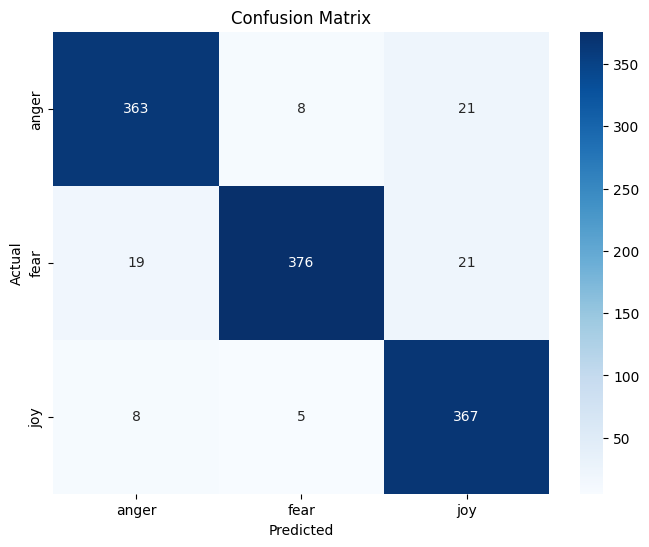

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Naive Bayes**

In [24]:
#naiveBayes Model
#import Gaussian naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nbc= MultinomialNB() #implements the Gaussian NB for Classification
nbc.fit(X_train, y_train) #fit the model on training data

MultinomialNB()

In [25]:
y_predict=nbc.predict(X_test) #model prediction

In [26]:
print("accuracy score%.3f" %acc_score(y_test, y_predict))

accuracy score0.908


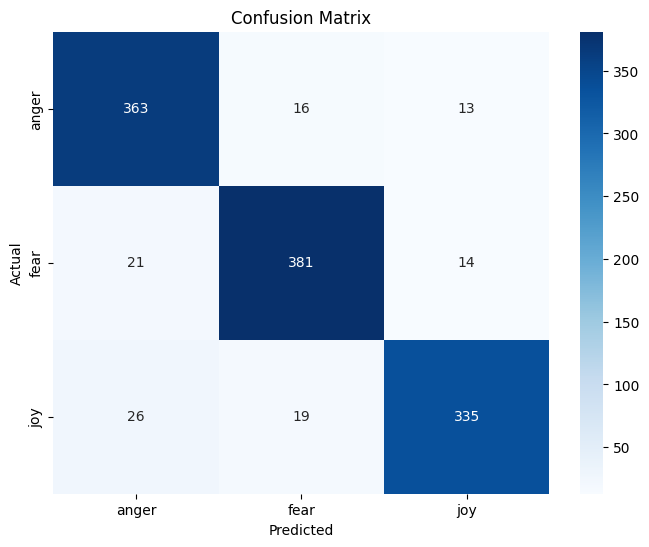

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
sentiment_mapping = {
    0: 'Anger',
    1: 'Fear',
    2: 'Joy',
    # Add more sentiments as needed
}

def interpret_label(label):
    return sentiment_mapping[label]

def predict_sentiment(text, vec, nbc, model):
    cleaned_text = clean_text(text)

    # Use the provided vectorizer to transform the cleaned text
    text_vectorized = vec.transform([cleaned_text]).toarray()

    # Make predictions using the trained models
    result_nbc = nbc.predict(text_vectorized)[0]
    result_logreg = model.predict(text_vectorized)[0]

    # Interpret the predicted labels using the sentiment mapping
    interpreted_nbc = interpret_label(result_nbc)
    interpreted_logreg = interpret_label(result_logreg)

    return interpreted_nbc, interpreted_logreg

# Example texts for sentiment prediction
text1 = "The new restaurant in town serves amazing dishes!"
text2 = "I feel afraid of the dark and spiders"
text3 = "I'm furious about the poor customer service, unacceptable!"

# Make predictions using the predict_sentiment function
result1_nbc, result1_logreg = predict_sentiment(text1, vec, nbc, model)
result2_nbc, result2_logreg = predict_sentiment(text2, vec, nbc, model)
result3_nbc, result3_logreg = predict_sentiment(text3, vec, nbc, model)

# Print the interpreted results
print(f'Text 1: Naive Bayes - {result1_nbc}, Logistic Regression - {result1_logreg}')
print(f'Text 2: Naive Bayes - {result2_nbc}, Logistic Regression - {result2_logreg}')
print(f'Text 3: Naive Bayes - {result3_nbc}, Logistic Regression - {result3_logreg}')

Text 1: Naive Bayes - Joy, Logistic Regression - Joy
Text 2: Naive Bayes - Fear, Logistic Regression - Fear
Text 3: Naive Bayes - Anger, Logistic Regression - Anger
